Creating plots: 100%|██████████| 81/81 [01:55<00:00,  1.43s/plot]


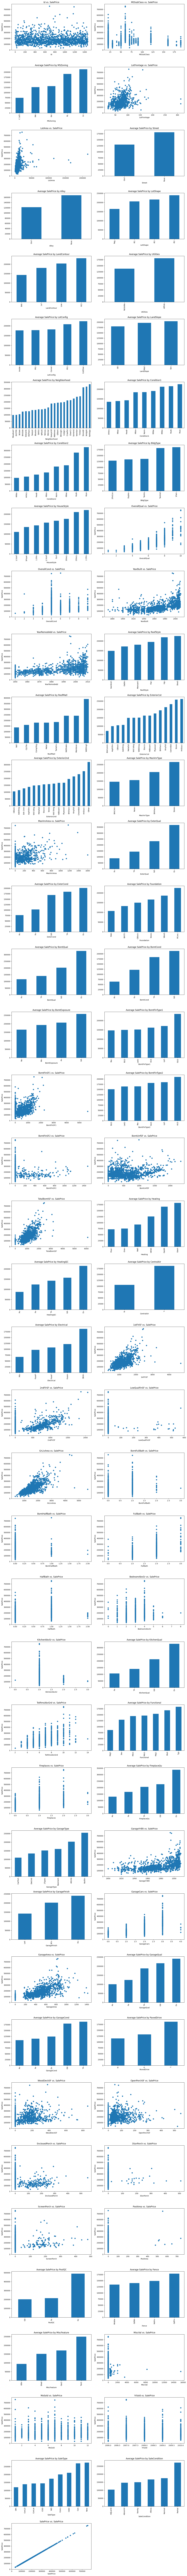

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load your dataset
df = pd.read_csv('../data/train.csv')

# Define the column name for the sales price
sales_price_column = 'SalePrice'

# Filter out the sales price column from the columns to plot against
columns_to_plot = [col for col in df.columns if col != sales_price_column or col != 'Id']

n_cols = 2
n_rows = (len(columns_to_plot) + 1) // n_cols
# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the DataFrame's columns and create a plot for each
for i, column in enumerate(tqdm(columns_to_plot, desc="Creating plots", unit="plot")):
    ax = axes[i]

    # Check data type of the column: numeric or categorical
    if pd.api.types.is_numeric_dtype(df[column]):
        # Create a scatter plot for numeric data
        ax.scatter(df[column], df[sales_price_column])
        ax.set_title(f'{column} vs. {sales_price_column}')
        ax.set_xlabel(column)
        ax.set_ylabel(sales_price_column)
    else:
        # For categorical data, plot each category's average sales price
        averages = df.groupby(column)[sales_price_column].mean().sort_values()
        averages.plot(kind='bar', ax=ax)
        ax.set_title(f'Average {sales_price_column} by {column}')

    # Improve spacing
    plt.tight_layout()

# If there are more subplots than columns, remove the empty subplots
if len(columns_to_plot) % n_cols:
    for j in range(i+1, n_rows * n_cols):
        fig.delaxes(axes[j])

# Show the plot
plt.show()